In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
sns.set_theme()

spotify = pd.read_csv(
    'corrected_spotify.csv'
)

spotify

,Index,HighestChartingPosition,NumberofTimesCharted,WeekofHighestCharting,SongName,Streams,Artist,ArtistFollowers,SongID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration(ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,1552,195,1,2019-12-27--2020-01-03,New Rules,4630675,Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320,0.608,A
1541,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,4623030,Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930,0.714,B
1542,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),4620876,Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307,0.394,D
1543,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,4607385,"Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784,0.881,F


In [61]:
spotify.dtypes

Index                        int64
HighestChartingPosition      int64
NumberofTimesCharted         int64
WeekofHighestCharting       object
SongName                    object
Streams                      int64
Artist                      object
ArtistFollowers              int64
SongID                      object
Genre                       object
ReleaseDate                 object
WeeksCharted                object
Popularity                   int64
Danceability               float64
Energy                     float64
Loudness                   float64
Speechiness                float64
Acousticness               float64
Liveness                   float64
Tempo                      float64
Duration(ms)                 int64
Valence                    float64
Chord                       object
dtype: object

In [62]:
high =[datetime.strptime(i[:10], '%Y-%m-%d') for i in spotify.WeekofHighestCharting]
spotify['RWeekofHighestCharting']=high
high_count=spotify.groupby(by='RWeekofHighestCharting').count()['Index']
high_count=high_count.reindex()
high_count

RWeekofHighestCharting
2019-12-27    89
2020-01-03    50
2020-01-10    22
2020-01-17    39
2020-01-24    18
              ..
2021-06-25    24
2021-07-02    23
2021-07-09    12
2021-07-16    15
2021-07-23    45
Name: Index, Length: 83, dtype: int64

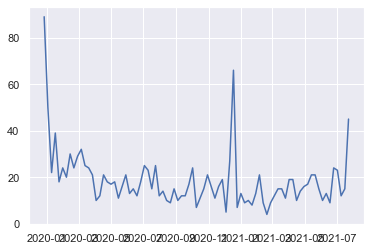

In [63]:
plt.plot(high_count)

In [375]:
eddyboy=analyze['pop' in spotify.Genre][['Popularity','RWeekofHighestCharting','Streams', 'ReleaseDate']]
songs = analyze.copy()
songs['contains_pop']=True

def check_genre (genre):
    for i, r in songs.iterrows():
    if(genre in r['Genre']):
        songs.loc[i,genre]=True
    else:
        songs.loc[i,genre]=False
        
songs=songs[songs.contains_pop==True]
sns.pairplot(data=songs,  y_vars=['Popularity'])
eddyboy=eddyboy[eddyboy.Popularity>0]
eddyboy=eddyboy.sort_values('ReleaseDate')
plt.plot(eddyboy['ReleaseDate'],eddyboy['Popularity'])
plt.plot(eddyboy['ReleaseDate'],eddyboy['Streams']/200000)
plt.show()

KeyError: False

,Popularity,Streams,Genre,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,NumberofTimesCharted,ArtistFollowers,Tempo,Duration(ms),Valence,Chord
0,100,48633449,"['indie rock italiano', 'italian pop']",0.714,0.800,-4.808,0.0504,0.12700,0.3590,8,3377762,134.002,211560,0.589,B
1,99,47248719,['australian hip hop'],0.591,0.764,-5.484,0.0483,0.03830,0.1030,3,2230022,169.928,141806,0.478,C#/Db
2,99,40162559,['pop'],0.563,0.664,-5.044,0.1540,0.33500,0.0849,11,6266514,166.928,178147,0.688,A
3,98,37799456,"['pop', 'uk pop']",0.808,0.897,-3.712,0.0348,0.04690,0.3640,5,83293380,126.026,231041,0.591,B
4,96,33948454,"['lgbtq+ hip hop', 'pop rap']",0.736,0.704,-7.409,0.0615,0.02030,0.0501,1,5473565,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,79,4630675,"['dance pop', 'pop', 'uk pop']",0.762,0.700,-6.021,0.0694,0.00261,0.1530,1,27167675,116.073,209320,0.608,A
1541,66,4623030,"['sertanejo', 'sertanejo universitario']",0.528,0.870,-3.123,0.0851,0.24000,0.3330,1,15019109,152.370,181930,0.714,B
1542,81,4620876,"['dance pop', 'electropop', 'pop', 'post-teen ...",0.765,0.523,-4.333,0.0300,0.18400,0.1320,1,22698747,104.988,217307,0.394,D
1543,60,4607385,"['brega funk', 'funk carioca']",0.832,0.550,-7.026,0.0587,0.24900,0.1820,1,208630,154.064,152784,0.881,F


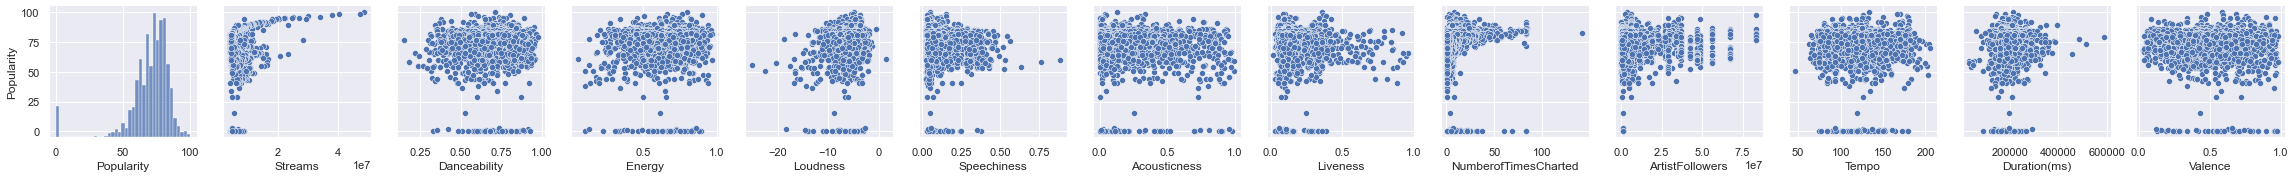

In [378]:
analyze=spotify[['Popularity','Streams','Genre','Danceability','Energy','Loudness','Speechiness','Acousticness','Liveness', "NumberofTimesCharted","ArtistFollowers",'Tempo','Duration(ms)','Valence','Chord']]
# analyze=analyze[analyze['Popularity']\]
popularity_y=sns.pairplot(data=analyze,  y_vars=['Popularity'])
figy=popularity_y.fig
figy.savefig("pop_y.jpg") 
analyze

In [374]:
genre_count={}
for i,r in analyze.iterrows():
    if r['Genre']:
        
        r['Genre']=[j.replace("[","").replace("]", "").strip().replace("'","") for j in r['Genre'].split(',')]
        analyze.loc[i,'Genre']=r['Genre']
        for g in r['Genre']:
            if g in genre_count.keys():
                genre_count[g]=genre_count[g]+1
            else:
                genre_count[g]=1
genres=np.array(list(genre_count.items()))
print(max(genre_count.items(),key=lambda x : x[1]))

genres

('dance pop', 54)


array([['indie rock italiano', '4'],
       ['australian hip hop', '4'],
       ['pop', '28'],
       ['lgbtq+ hip hop', '5'],
       ['dance pop', '54'],
       ['puerto rican pop', '4'],
       ['latin', '29'],
       ['k-pop', '8'],
       ['canadian pop', '3'],
       ['canadian contemporary r&b', '6'],
       ['reggaeton', '4'],
       ['gauze pop', '1'],
       ['dfw rap', '4'],
       ['colombian pop', '4'],
       ['chicago rap', '8'],
       ['latin pop', '2'],
       ['big room', '1'],
       ['cali rap', '2'],
       ['trap argentino', '1'],
       ['argentine hip hop', '2'],
       ['electropop', '5'],
       ['brostep', '2'],
       ['dreamo', '1'],
       ['houston rap', '1'],
       ['german dance', '1'],
       ['modern alternative rock', '3'],
       ['canadian hip hop', '7'],
       ['brooklyn drill', '11'],
       ['aussietronica', '1'],
       ['mexican hip hop', '1'],
       ['australian pop', '1'],
       ['comic', '2'],
       ['rap', '7'],
       ['melanesian po

170

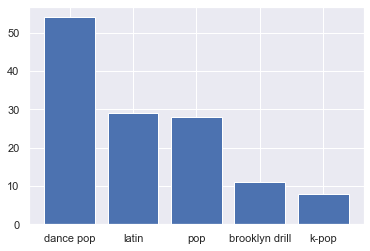

In [369]:
genredf=pd.DataFrame(genres, columns=["Genre", "Count"])
genredf.Count=pd.to_numeric(genredf.Count)
genredf=genredf.sort_values(by="Count", ascending=False)
hgenredf=genredf.head()
plt.bar(hgenredf.Genre, hgenredf.Count)
genredf.size



Appears that danceability, energy, loudness, speechinessliveliness, tempo, duration all make the most difference

In [ ]:
# Check if the features of data points with less popularity
sns.pairplot(data=analyze[analyze.Popularity<15])

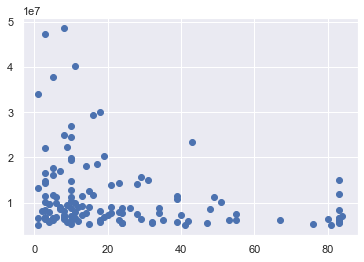

In [268]:
analyze1=analyze[analyze.Popularity>=85] 
plt.scatter(analyze1.NumberofTimesCharted, analyze1.Streams)


20


<AxesSubplot:xlabel='Popularity', ylabel='Loudness'>

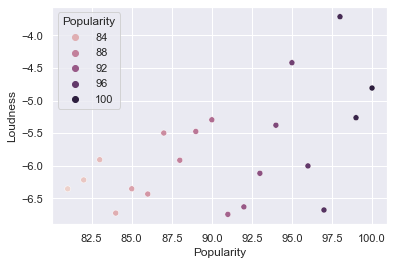

In [376]:
dance=analyze.groupby('Popularity').mean()
dance=dance.reset_index()
print(dance.Energy.size)
sns.scatterplot(y=dance.Loudness, x=dance.Popularity, hue=dance.Popularity, data=dance)

1393


<AxesSubplot:xlabel='Loudness', ylabel='Popularity'>

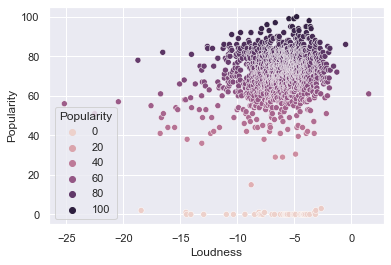

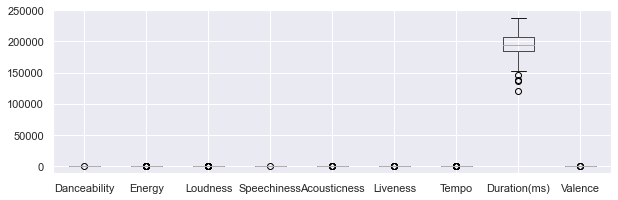

In [207]:
plt.figure(figsize=(10,3))
analyze.boxplot(column=['Danceability','Energy','Loudness','Speechiness','Acousticness','Liveness','Tempo','Duration(ms)','Valence'])
plt.show()

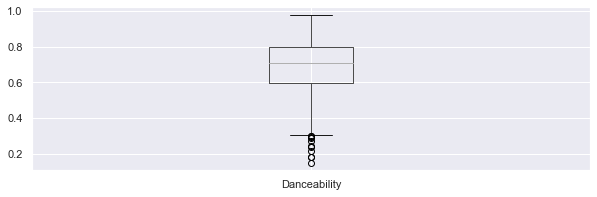

In [208]:
plt.figure(figsize=(10,3))
analyze.boxplot(column=['Danceability'])
plt.show()

<AxesSubplot:xlabel='Speechiness', ylabel='Popularity'>

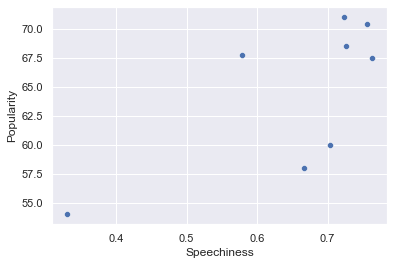

In [261]:
minimum =analyze.Danceability.min()
maximum= analyze.Danceability.max()

def group_Col (column, i):
    intervals =np.linspace(minimum, maximum, num=i)
    ndf=pd.DataFrame(columns=(column,'Popularity'))
    l_interval=intervals[0]
    for i in intervals[1:]:
        temp = analyze[analyze[column]>l_interval]
        temp=temp[temp[column]<i]
        l_interval=i
        dval=pd.DataFrame({
            column:[temp.Danceability.mean()],
            'Popularity': [temp.Popularity.mean()]
        })
        ndf=ndf.append(dval)
    return ndf
    
col='Speechiness'
dance_grp=group_Col(col,10)
sns.scatterplot(y=dance_grp.Popularity, x=dance_grp[col], data=dance_grp)

69


<AxesSubplot:xlabel='Popularity', ylabel='Speechiness'>

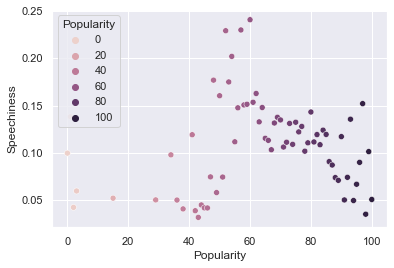

In [379]:
dance=analyze.groupby('Popularity').mean()
dance=dance.reset_index()
print(dance.Energy.size)
sns.scatterplot(y=dance.Speechiness, x=dance.Popularity, hue=dance.Popularity, data=dance)

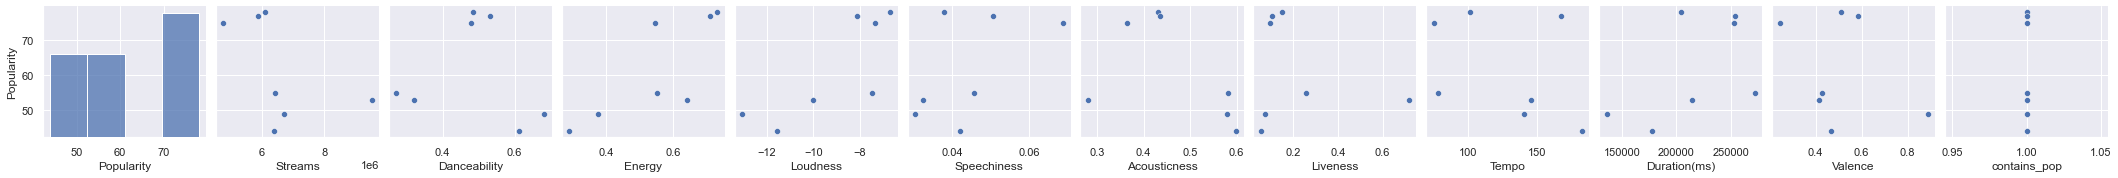

In [206]:
songs = analyze.copy()
songs['contains_pop']=True

def check_genre (genre):
    for i, r in songs.iterrows():
    if(genre in r['Genre']):
        songs.loc[i,genre]=True
    else:
        songs.loc[i,genre]=False
        
songs=songs[songs.contains_pop==True]
sns.pairplot(data=songs,  y_vars=['Popularity'])